# Keras Sequential Models

__Keras__ is a high-level frontend to TensorFlow that allows you to think about neural networks in terms of _layers_. Keras exposes 2 different APIs for this purpose, the _Sequential_ API and the _Functional_ API.

The Sequential API is ideal for the common case where your network is just a sequence of layers. You start with an empty `Sequential` object, akin to a list, and append your desired layers.

## Imports

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Reshape, Flatten
from keras.layers import Dense, Conv2D, MaxPooling2D

Using TensorFlow backend.


## MNIST handwritten digits

For this tutorial, we will be using the MNIST dataset. Keras provides us this dataset for easily prototyping new models.

After we load the data, we add a new axis to the inputs to be the "channel" dimension. Then we convert the labels to a one-hot encoding.

x shape = (60000, 28, 28, 1) (10000, 28, 28, 1)
y shape = (60000, 10) (10000, 10)


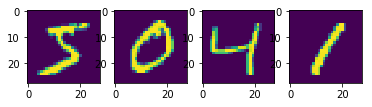

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('x shape =', x_train.shape, x_test.shape)
print('y shape =', y_train.shape, y_test.shape)

plt.ion()
fig, axs = plt.subplots(1, 4)
for ax, x in zip(axs, x_train):
    ax.imshow(x.squeeze())

## Constructing the Model

Building a VGG-like CNN is easy.

We start with a `Sequential` model, to which we will be adding the layers.

For the first block, we start with two 32-channel 3x3 convolution layers with ReLU activation, followed by a 2x2 max-pooling layer, and dropout. You must provide an input shape to the first layer, but the input shape can be infered for all of the others.

The second block is like the first, but with 64 channels.

In the third block, we flatten each image into a vector and feed that to a 256-neuron fully-connected layer, followed by strong dropout.

Finally, the output is fead into a 10-class softmax regression.

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

## Evaluating

Evaluating your model is also easy.

First you must "compile" your model into a form Keras can train. This locks down the architecture of your model, so you can't add new layers. As part of the compilation process, you specify the loss function that your model will be fit agains and the optimization algorithm used to update the weights.

To train your model, you simply call `model.fit` with your training data and things like your batch size and number of epochs.

Once the model is trained, you can easily check it's accuracy with `model.evaluate`.

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x_train, y_train, batch_size=32, epochs=10)
model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 219s - loss: 13.3947   
Epoch 2/10
60000/60000 [==============================] - 202s - loss: 13.4990   
Epoch 3/10
60000/60000 [==============================] - 204s - loss: 13.6713   
Epoch 4/10
60000/60000 [==============================] - 205s - loss: 13.4828   
Epoch 5/10
60000/60000 [==============================] - 208s - loss: 13.4702   
Epoch 6/10
60000/60000 [==============================] - 207s - loss: 13.7168   
Epoch 7/10
60000/60000 [==============================] - 207s - loss: 13.4275   
Epoch 8/10
60000/60000 [==============================] - 235s - loss: 12.9826   
Epoch 9/10
60000/60000 [==============================] - 250s - loss: 12.9885   
Epoch 10/10
10000/10000 [==============================] - 10s    


14.533686416625976

## Saving and loading from disk

You can save a model with `model.save` and load a model with `keras.models.load_model`.

When you load a model from disk, the result is already compiled.

In [5]:
model.save('mnist_cnn.h5')
model = keras.models.load_model('mnist_cnn.h5')